In [1]:
!pip -qqq install qiskit[visualization]
!pip -qqq install qiskit-aer
import qiskit
%matplotlib inline
qiskit.__version__

# Not always necessary (jcperez@disca.upv.es):
!pip -qqq install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

# To fix a bug/version incompatibility in that file (jcperez@disca.upv.es):
# !sed -ie 's/denominator >/denominator() >/g' /usr/local/lib/python3.10/dist-packages/qiskit/visualization/array.py

# To set graphical circuit drawing by default in qiskit (jcperez@disca.upv.es):
!mkdir ${HOME}/.qiskit 2>/dev/null
!printf "[default]\ncircuit_drawer = mpl\ncircuit_mpl_style = iqp\n" > ${HOME}/.qiskit/settings.conf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 92.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.3 MB/s eta 0:00:00


In [2]:
#!pip install numexpr
#!pip install pylatexenc

from qiskit import *
from qiskit.visualization import plot_distribution
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from math import sqrt, pi
import numpy as np

import pandas as pd

from numpy.linalg import pinv

from qiskit.quantum_info import SparsePauliOp,Pauli
from qiskit.circuit.library import PauliEvolutionGate
from qiskit import transpile

In [3]:
I=np.array([[1,0],[0,1]])
X=np.array([[0,1],[1,0]])
Y=np.array([[0,-1j],[1j,0]])
Z=np.array([[1,0],[0,-1]])

In [4]:
II=np.kron(I,I)
IX=np.kron(I,X)
IY=np.kron(I,Y)
IZ=np.kron(I,Z)

XI=np.kron(X,I)
XX=np.kron(X,X)
XY=np.kron(X,Y)
XZ=np.kron(X,Z)

YI=np.kron(Y,I)
YX=np.kron(Y,X)
YY=np.kron(Y,Y)
YZ=np.kron(Y,Z)

ZI=np.kron(Z,I)
ZX=np.kron(Z,X)
ZY=np.kron(Z,Y)
ZZ=np.kron(Z,Z)

In [5]:
J=1
h=0.5
H=J*ZZ+h*IX+h*XI
autoval, autovec=np.linalg.eig(H)
print("Autovalores:", autoval)
print("Autovectores:", autovec)

Autovalores: [ 1.41421356  1.         -1.41421356 -1.        ]
Autovectores: [[-6.53281482e-01 -7.07106781e-01 -2.70598050e-01  6.02732551e-17]
 [-2.70598050e-01  4.19654635e-16  6.53281482e-01 -7.07106781e-01]
 [-2.70598050e-01  5.71679052e-16  6.53281482e-01  7.07106781e-01]
 [-6.53281482e-01  7.07106781e-01 -2.70598050e-01  2.26806709e-16]]


In [7]:
base_ix_00=0.003 #0.106
base_ix_01=0.211 #0.089
base_ix_10=0.594 #0.661
base_ix_11=0.192 #0.144

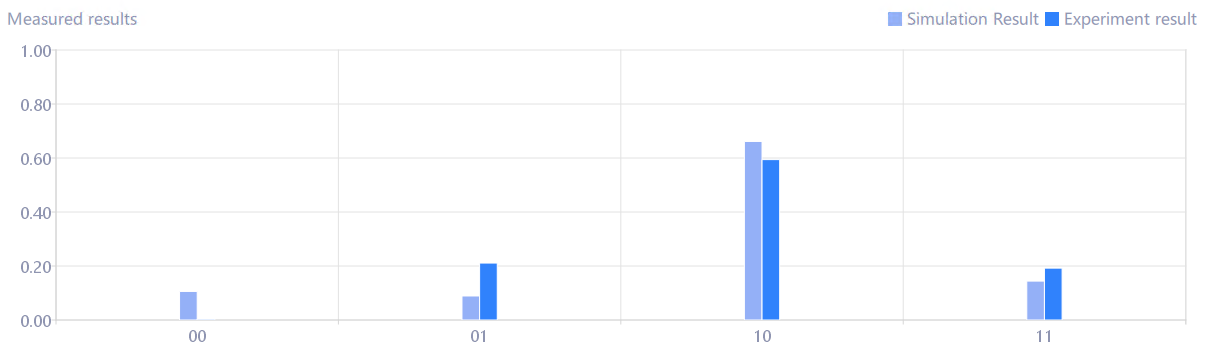

In [8]:
base_xi_00=0.092 #0.083
base_xi_01=0.101 #0.067
base_xi_10=0.633 #0.616
base_xi_11=0.174 #0.235

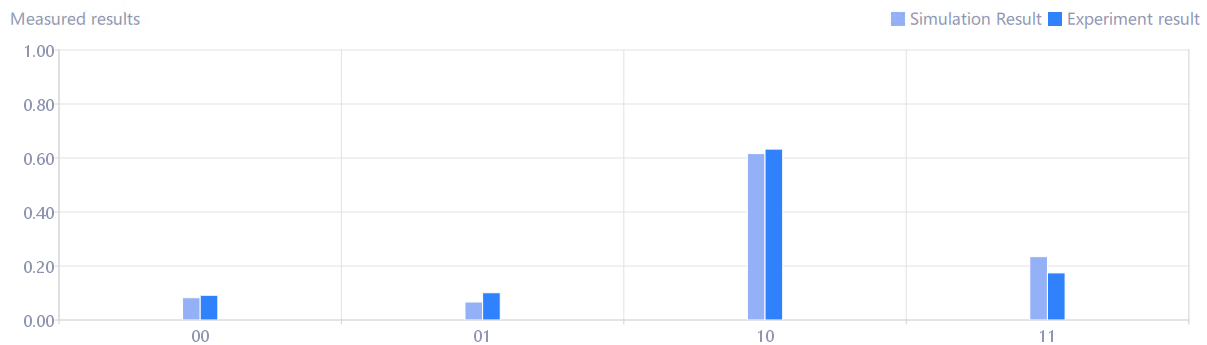

In [9]:
base_zz_00=0.134 #0.127
base_zz_01=0.134 #0.067
base_zz_10=0.571 #0.572
base_zz_11=0.161 #0.234

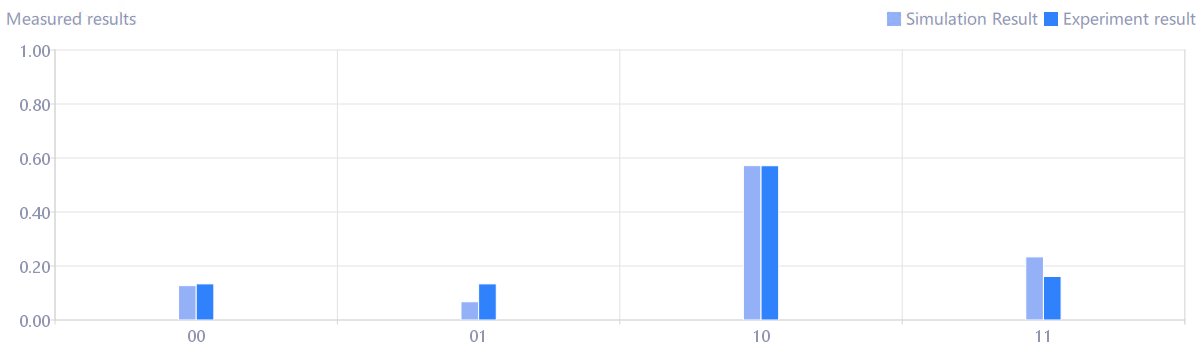

In [10]:
base_ix=base_ix_00+base_ix_11-base_ix_01-base_ix_10
base_xi=base_xi_00+base_xi_11-base_xi_01-base_xi_10
base_zz=base_zz_00+base_zz_11-base_zz_01-base_zz_10

print(base_zz, base_ix, base_xi)

-0.4099999999999999 -0.61 -0.46799999999999997


In [11]:
inc_tau=0.5
J=1
h=0.5

H_esp=J*base_zz+h*base_ix+h*base_xi
print(H_esp)

-0.9489999999999998
